# Studying - An Overview of the Spanish Energy Generation

In [653]:
import pandas as pd

df_energy = pd.read_csv('all-technology_2019-2021.csv', index_col=0)
df_energy

,technology,year,month,day,hour,generation_mwh
0,Carbon,2019,1,1,0,1867.0
1,Carbon,2019,1,1,1,1618.0
2,Carbon,2019,1,1,2,1535.3
3,Carbon,2019,1,1,3,1344.0
4,Carbon,2019,1,1,4,1345.0
...,...,...,...,...,...,...
420859,Other Renewables,2021,12,31,19,602.7
420860,Other Renewables,2021,12,31,20,608.2
420861,Other Renewables,2021,12,31,21,606.7
420862,Other Renewables,2021,12,31,22,607.5


## [x] Select the data from 2021

### Filter the rows

In [654]:
mask = df_energy.year == 2021

In [655]:
df_energy = df_energy[mask].copy()

### Drop the column `year`

In [656]:
df_energy = df_energy.drop(columns='year')
df_energy

,technology,month,day,hour,generation_mwh
17544,Carbon,1,1,0,250.0
17545,Carbon,1,1,1,250.0
17546,Carbon,1,1,2,243.0
17547,Carbon,1,1,3,265.0
17548,Carbon,1,1,4,250.0
...,...,...,...,...,...
420859,Other Renewables,12,31,19,602.7
420860,Other Renewables,12,31,20,608.2
420861,Other Renewables,12,31,21,606.7
420862,Other Renewables,12,31,22,607.5


### Reset the index to start from 0

In [657]:
df_energy = df_energy.reset_index(drop=True)
df_energy

,technology,month,day,hour,generation_mwh
0,Carbon,1,1,0,250.0
1,Carbon,1,1,1,250.0
2,Carbon,1,1,2,243.0
3,Carbon,1,1,3,265.0
4,Carbon,1,1,4,250.0
...,...,...,...,...,...
140155,Other Renewables,12,31,19,602.7
140156,Other Renewables,12,31,20,608.2
140157,Other Renewables,12,31,21,606.7
140158,Other Renewables,12,31,22,607.5


## In total, how much energy was generated?

In [658]:
df_energy.generation_mwh.sum()

252448090.89999998

In [659]:
df_energy.generation_mwh.sum() * 100 #interesting

25244809089.999996

## [x] Which was the technology that generated more energy?

### Data processing

#### Calculate the total generation by each technology

In [660]:
mask = df_energy.technology != 'Total Exports'
#df_without_year['technology'].unique() #great! #notsogreat! -> m

In [661]:
df_energy = df_energy[mask].copy()

In [662]:
res = df_energy.groupby(by='technology').generation_mwh.sum()
res

technology
Carbon                      5016801.7
Cogeneration               26373562.5
Combined Cycle             37818619.7
Domestic Residuals          1519093.9
Eolic                      59798598.5
Hydraulic No UGH            5259688.0
Hydraulic UGH              24293665.7
Non-renewable Residuals     2885383.4
Nuclear                    54124826.1
Other Renewables            4811035.1
Other Residuals             1019779.2
Photovoltaic Solar         20560541.2
Photovoltaic Thermal        5042200.9
Pumping Turbine             2475511.7
Total Imports              21604101.0
Name: generation_mwh, dtype: float64

#### Sort the most used technologies at the beginning of the table

In [663]:
res = res.sort_values(ascending=False)
res

technology
Eolic                      59798598.5
Nuclear                    54124826.1
Combined Cycle             37818619.7
Cogeneration               26373562.5
Hydraulic UGH              24293665.7
Total Imports              21604101.0
Photovoltaic Solar         20560541.2
Hydraulic No UGH            5259688.0
Photovoltaic Thermal        5042200.9
Carbon                      5016801.7
Other Renewables            4811035.1
Non-renewable Residuals     2885383.4
Pumping Turbine             2475511.7
Domestic Residuals          1519093.9
Other Residuals             1019779.2
Name: generation_mwh, dtype: float64

#### Reset the index to transform the previous object to a `DataFrame`

In [664]:
dfres = res.reset_index()
dfres

,technology,generation_mwh
0,Eolic,59798598.5
1,Nuclear,54124826.1
2,Combined Cycle,37818619.7
3,Cogeneration,26373562.5
4,Hydraulic UGH,24293665.7
5,Total Imports,21604101.0
6,Photovoltaic Solar,20560541.2
7,Hydraulic No UGH,5259688.0
8,Photovoltaic Thermal,5042200.9
9,Carbon,5016801.7


### Visualize the data with a bar plot

In [668]:
import plotly.express as px

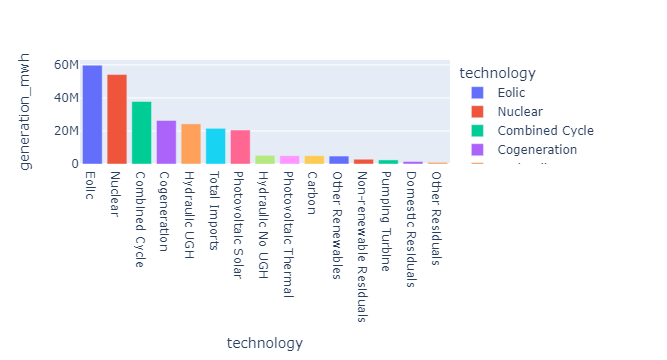

In [669]:
px.bar(data_frame=dfres, x='technology', y='generation_mwh', color='technology')

### Customize the bar plot

#### Make the bars horizontal

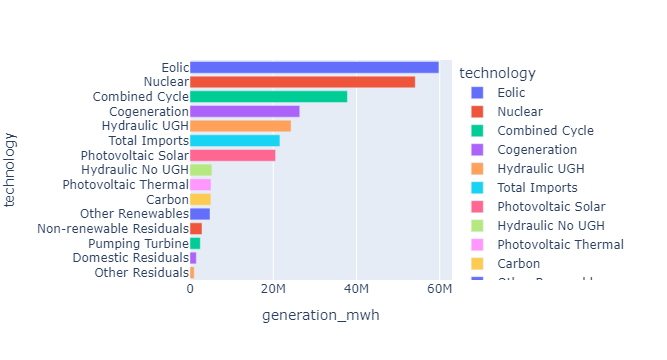

In [682]:
px.bar(data_frame=dfres, x='generation_mwh', y='technology', color='technology') 
#if color is enabled the data is already sorted

#### Sort the data and visualize it again

In [624]:
dfres = dfres.sort_values('generation_mwh').reset_index(drop=True)
dfres

,technology,generation_mwh
0,Other Residuals,1019779.2
1,Domestic Residuals,1519093.9
2,Pumping Turbine,2475511.7
3,Non-renewable Residuals,2885383.4
4,Other Renewables,4811035.1
5,Carbon,5016801.7
6,Photovoltaic Thermal,5042200.9
7,Hydraulic No UGH,5259688.0
8,Photovoltaic Solar,20560541.2
9,Total Imports,21604101.0


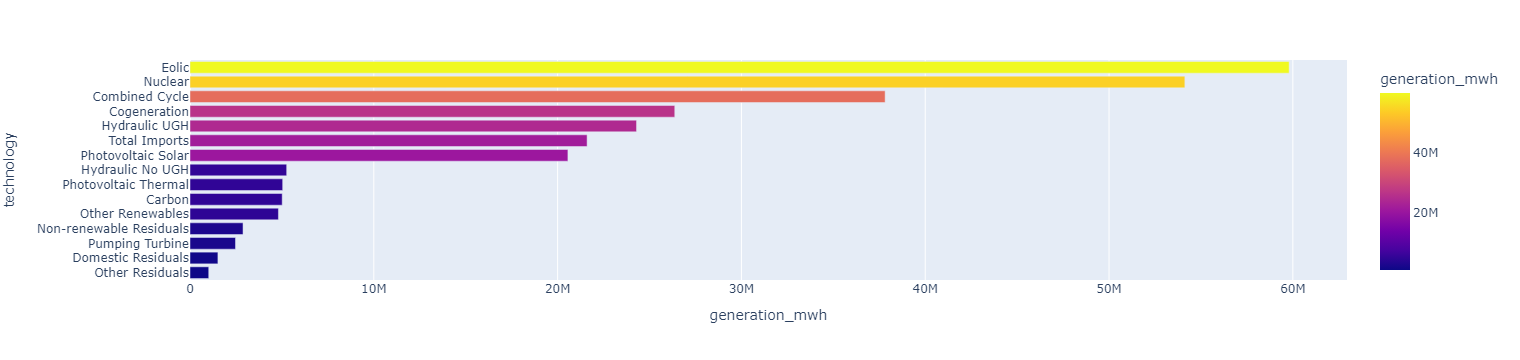

In [626]:
px.bar(data_frame=dfres, x='generation_mwh', y='technology', color='generation_mwh') #also added color

### Is a pie plot better for this data?

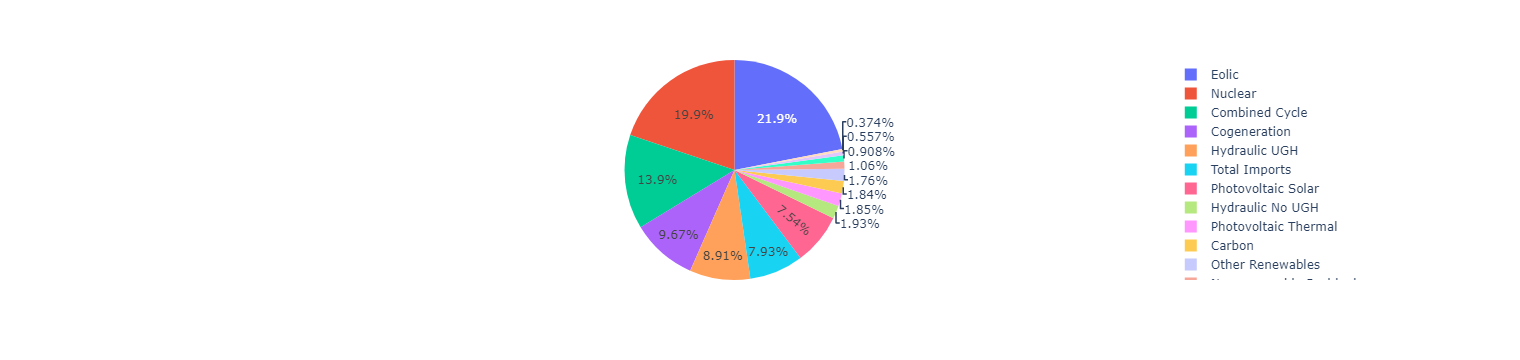

In [627]:
px.pie(dfres, values='generation_mwh', names='technology')

## [x] Which was the month that demanded more energy?

### Data processing

In [685]:
#1. Calculate the total generation by each technology
dfres = df_energy.groupby('month').generation_mwh.sum().reset_index()
dfres

,month,generation_mwh
0,1,25555560.1
1,2,22094532.3
2,3,23219357.2
3,4,21268843.6
4,5,21847736.3
5,6,21387776.9
6,7,23703511.7
7,8,22988218.6
8,9,21589279.1
9,10,21394625.8


In [686]:
dfres = res.reset_index(drop=True)
dfres

,month,generation_mwh
0,1,25555560.1
1,2,22094532.3
2,3,23219357.2
3,4,21268843.6
4,5,21847736.3
5,6,21387776.9
6,7,23703511.7
7,8,22988218.6
8,9,21589279.1
9,10,21394625.8


### Data visualization

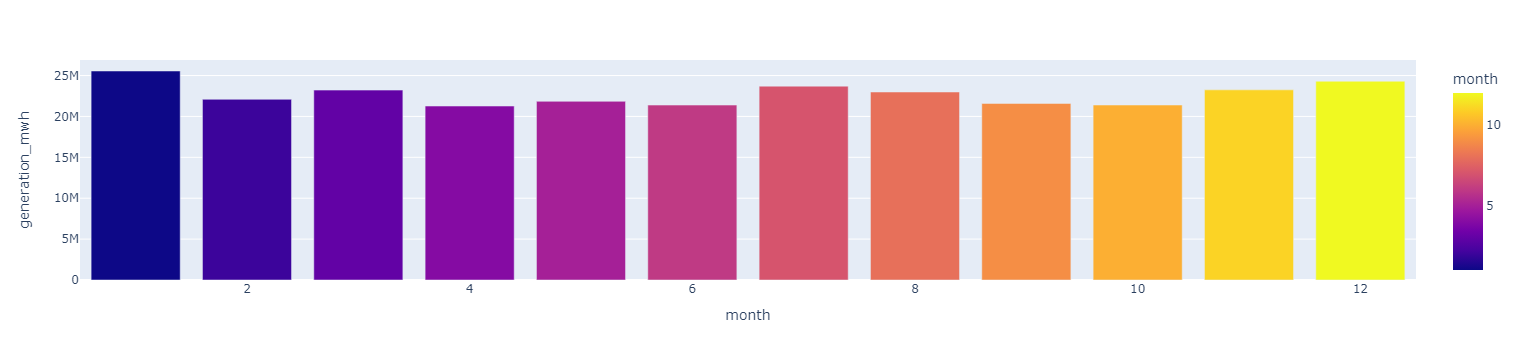

In [571]:
px.bar(data_frame=res, x='month', y='generation_mwh', color='month')

## [ ] Which was the month-technology that generated more energy?

### Data processing

In [574]:
dfres = df_energy.groupby(['month', 'technology']).generation_mwh.sum().reset_index()

In [575]:
dfres

,month,technology,generation_mwh
0,1,Carbon,569862.6
1,1,Cogeneration,2404774.2
2,1,Combined Cycle,2132026.7
3,1,Domestic Residuals,109129.0
4,1,Eolic,7039018.0
...,...,...,...
175,12,Other Residuals,79792.1
176,12,Photovoltaic Solar,1030980.8
177,12,Photovoltaic Thermal,117412.2
178,12,Pumping Turbine,239011.1


### Data visualization

#### Create a bar plot

##### Differentiate each technology with a `color`

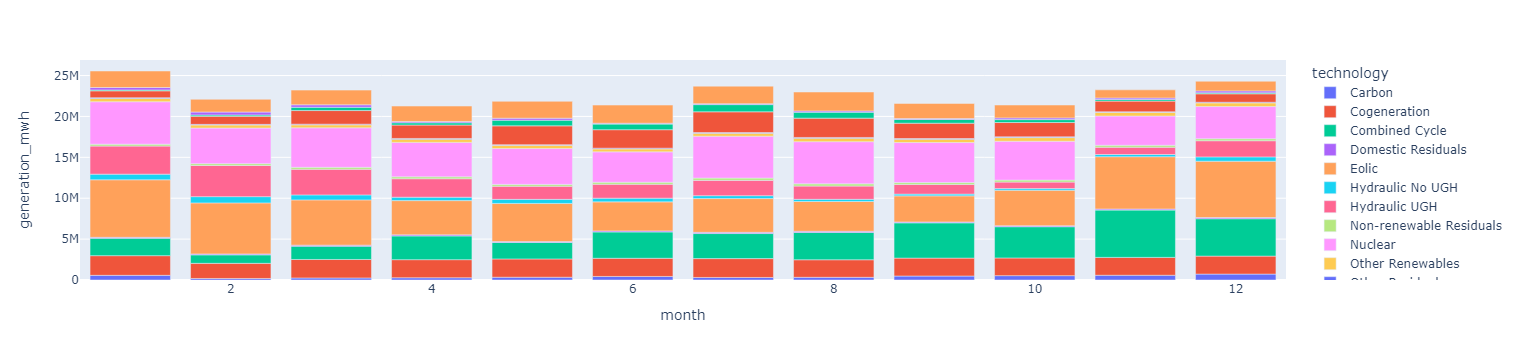

In [576]:
px.bar(data_frame=dfres, x='month', y='generation_mwh', color='technology')

##### Differentiate each technology with a `facet_col`

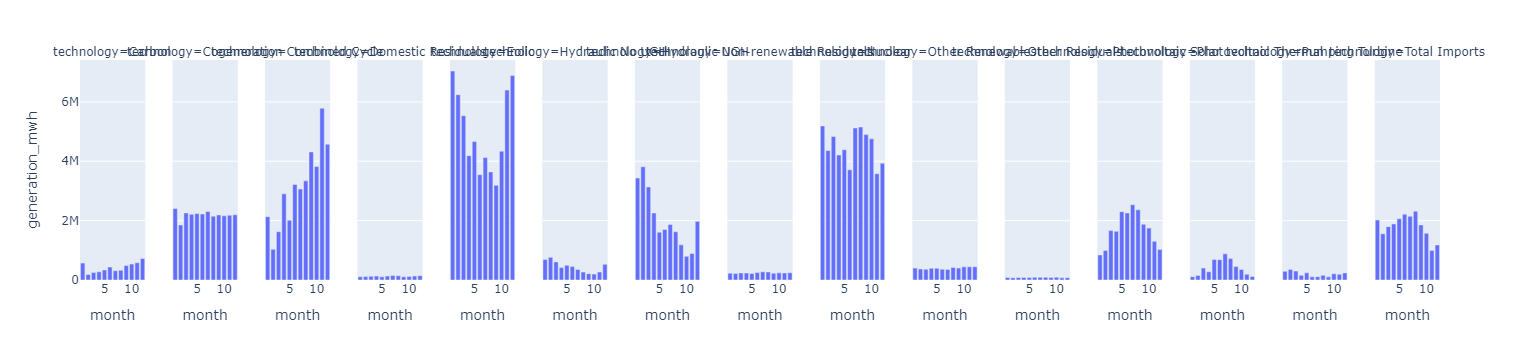

In [577]:
px.bar(data_frame=dfres, x='month', y='generation_mwh', facet_col='technology')

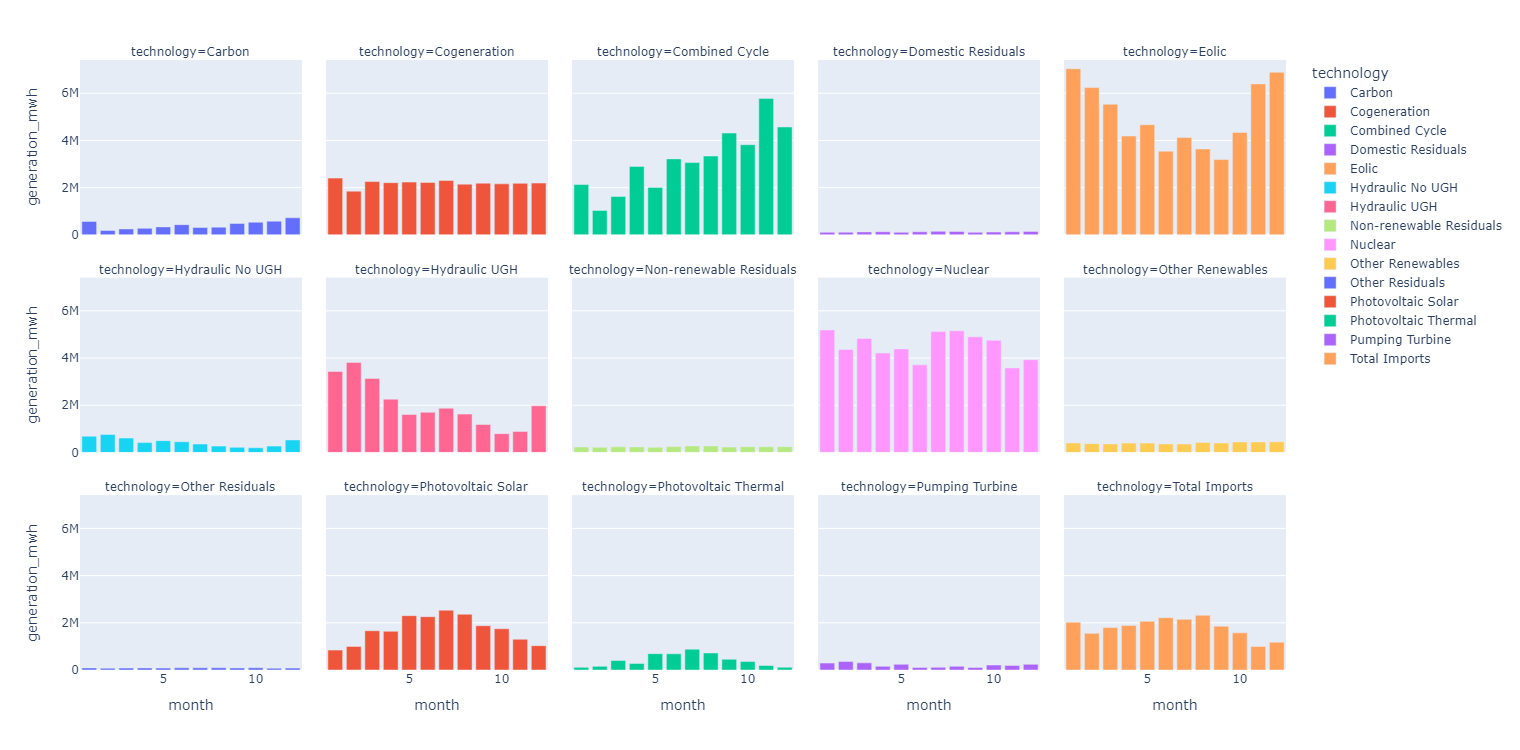

In [579]:
px.bar(data_frame=dfres, x='month', y='generation_mwh', facet_col='technology', facet_col_wrap=5, height=750, color='technology')

#### Create an area plot

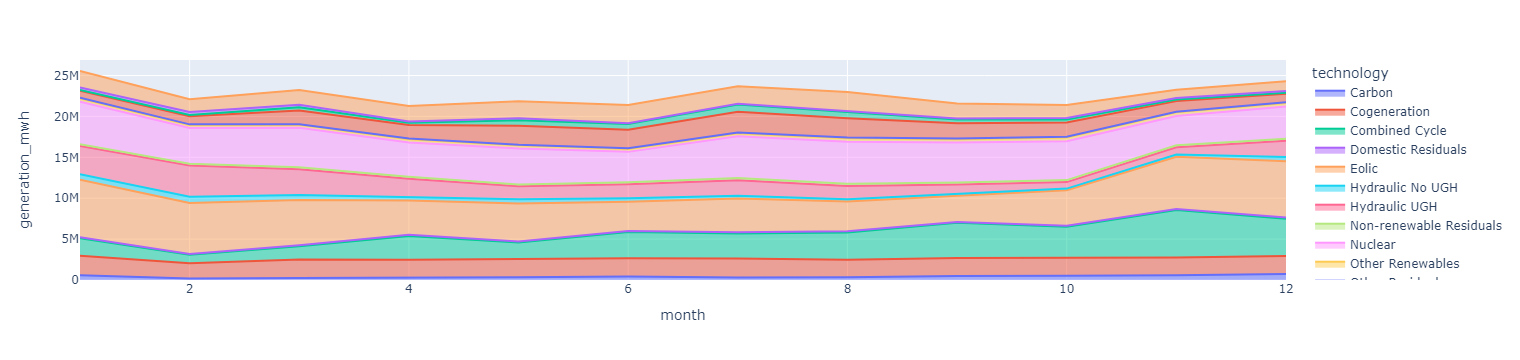

In [580]:
px.area(data_frame=dfres, x='month', y='generation_mwh', color='technology')

## [ ] How much energy was generated each hour of the year?

### Data Processing

In [581]:
#res = resullt / #dfres = result as a dataframe / #reset_index(drop=True) / #sort_values(ascending=False) -> common pattern / #use mask technique to filter data

In [689]:
res = df_energy.groupby(['month', 'day', 'hour']).generation_mwh.sum()
res

month  day  hour
1      1    0       27984.6
            1       28001.7
            2       27175.4
            3       26634.0
            4       26163.3
                     ...   
12     31   19      29118.6
            20      28781.2
            21      28310.3
            22      25336.1
            23      24480.4
Name: generation_mwh, Length: 8759, dtype: float64

### Data visualization

#### Create a histogram

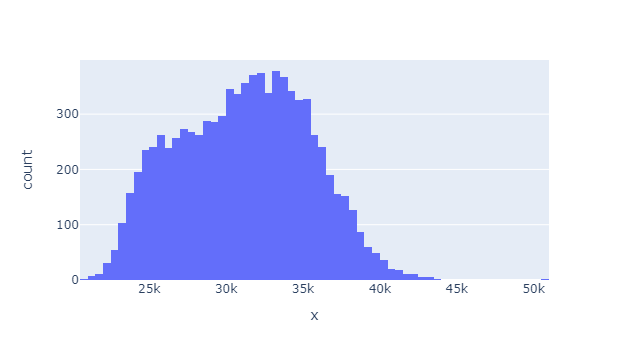

In [693]:
px.histogram(x=res)

#### Create a boxplot

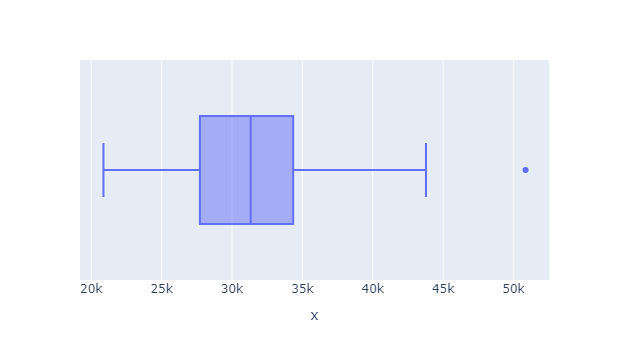

In [694]:
px.box(x=res)